# Customer Churn Prediction Using Ensemble and Tree-Based Models

### Dataset 
https://www.kaggle.com/datasets/barun2104/telecom-churn

## Objective: To build a customer churn prediction model that will predict if a customer will unsubscribe or stop using a service. Use Gradient Boosting Classifier, Decision Tree Classifier, and Random Forest Classifier.

### Target variable: Churn (0 or 1)  1 if customer cancelled service, 0 if not

### Features: 10 total – a mix of integers and floats related to the services used by each customer.

In [1]:
# Import Libraries

import pandas as pd                  # For data manipulation and analysis using DataFrames (e.g., loading CSVs, filtering, grouping)
import numpy as np                   # For numerical operations, and mathematical functions used in data preprocessing
import seaborn as sns                # For advanced, beautiful statistical visualizations (like heatmaps, boxplots, etc.)
import matplotlib.pyplot as plt      # For creating plots and graphs (line charts, bar charts, confusion matrix visualization)
from sklearn.model_selection import train_test_split   # For splitting the dataset into training and testing sets   
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# accuracy_score - Measures the percentage of correct predictions. 
# classification_report - Provides precision, recall, f1-score, and support for each class
# confusion_matrix - Shows the actual vs predicted classifications to understand model performance
# ConfusionMatrixDisplay - used to visualize the confusion matrix of a classification model in a clean and standardized way

In [2]:
# Load and Explore Data
tel_df = pd.read_csv('telecom_churn.csv')  
tel_df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [3]:
tel_df.shape

(3333, 11)

In [4]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
tel_df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [6]:
tel_df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [7]:
tel_df.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [8]:
tel_df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [9]:
tel_df.dtypes

Churn                int64
AccountWeeks         int64
ContractRenewal      int64
DataPlan             int64
DataUsage          float64
CustServCalls        int64
DayMins            float64
DayCalls             int64
MonthlyCharge      float64
OverageFee         float64
RoamMins           float64
dtype: object

In [10]:
tel_df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [11]:
tel_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [12]:
tel_df.duplicated().sum()

0

In [13]:
tel_df['Churn'].value_counts()  # Check class balance

Churn
0    2850
1     483
Name: count, dtype: int64

In [14]:
for col in tel_df.columns:
    print(f"\nColumn: {col}")
print(tel_df[col].value_counts(dropna=False)) 


Column: Churn

Column: AccountWeeks

Column: ContractRenewal

Column: DataPlan

Column: DataUsage

Column: CustServCalls

Column: DayMins

Column: DayCalls

Column: MonthlyCharge

Column: OverageFee

Column: RoamMins
RoamMins
10.0    62
11.3    59
9.8     56
10.9    56
10.1    53
        ..
2.7      1
18.9     1
17.2     1
1.3      1
2.5      1
Name: count, Length: 162, dtype: int64


In [15]:
# Features and Target
X = tel_df.drop('Churn', axis=1)
y = tel_df['Churn']

# Train-test split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
# random_state=42 is used to control randomness in functions that involve random splitting or shuffling

In [16]:
X_train

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2016,80,1,0,0.23,3,202.4,118,59.3,13.01,9.2
1362,63,1,0,0.00,3,132.9,122,29.0,3.35,9.9
2670,116,1,1,2.43,2,221.0,108,75.3,7.55,9.0
2210,71,1,0,0.00,0,278.9,110,64.0,9.51,11.7
1846,120,1,1,3.11,1,177.9,117,77.1,8.76,11.5
...,...,...,...,...,...,...,...,...,...,...
1095,106,1,0,0.00,1,274.4,120,64.0,9.93,6.0
1130,122,1,0,0.00,1,35.1,62,22.0,9.04,12.7
1294,66,1,0,0.24,1,87.6,76,40.4,13.10,9.2
860,169,1,0,0.00,2,179.2,111,46.0,8.76,9.9


In [17]:
X_test

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
438,113,1,0,0.00,1,155.0,93,55.0,16.53,13.5
2674,67,1,0,0.00,0,109.1,117,38.0,10.87,12.8
1345,98,1,0,0.00,4,0.0,0,14.0,7.98,6.8
1957,147,1,0,0.33,1,212.8,79,57.3,10.21,10.2
2148,96,1,0,0.30,1,144.0,102,47.0,11.24,10.0
...,...,...,...,...,...,...,...,...,...,...
3080,82,1,0,0.21,0,135.4,102,46.1,11.86,17.5
2548,117,1,1,3.21,1,153.2,112,81.1,13.17,11.9
2916,104,1,0,0.30,2,113.6,87,36.0,7.93,10.5
2655,64,1,0,0.40,1,219.2,73,56.0,8.35,10.0


In [18]:
y_train.shape

(2333,)

In [19]:
y_test.shape

(1000,)

Model Building

We are training using Decision Tree Classifier, Random Forest Classifier and Gradient Boosting Classifier,.

In [20]:
dt_model = DecisionTreeClassifier(max_depth = 5, random_state=42 )
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [21]:
y_pred_dt_model = dt_model.predict(X_test)
y_pred_rf_model = rf_model.predict(X_test)
y_pred_gb_model = gb_model.predict(X_test)

Model evaluation


Gradient Boosting Results
Accuracy: 0.943
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       857
           1       0.89      0.69      0.77       143

    accuracy                           0.94      1000
   macro avg       0.92      0.84      0.87      1000
weighted avg       0.94      0.94      0.94      1000

Confusion Matrix:
 [[845  12]
 [ 45  98]]

Decision Tree Results
Accuracy: 0.923
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       857
           1       0.84      0.57      0.68       143

    accuracy                           0.92      1000
   macro avg       0.88      0.78      0.82      1000
weighted avg       0.92      0.92      0.92      1000

Confusion Matrix:
 [[841  16]
 [ 61  82]]

Random Forest Results
Accuracy: 0.937
Classification Report:
               precision    recall  f1-score   support

           0  

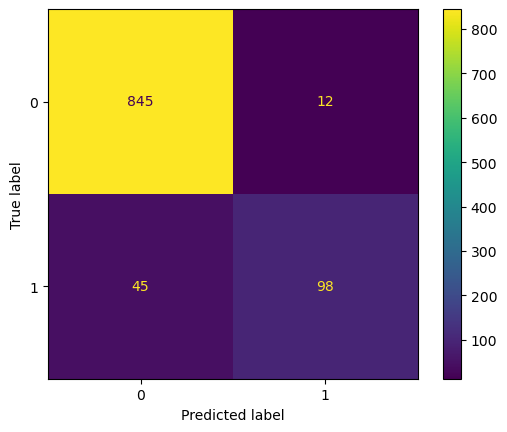

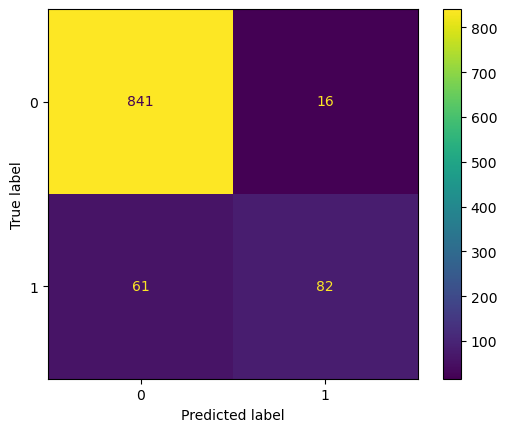

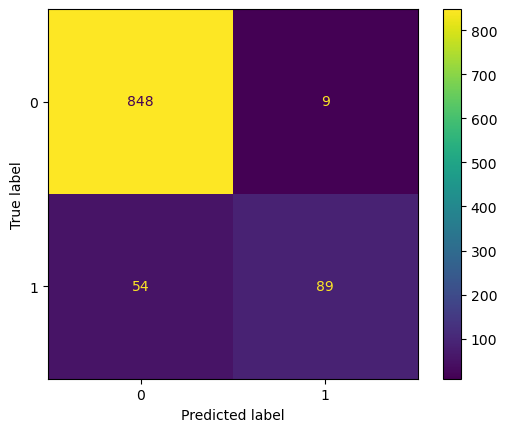

In [22]:
models = {
    'Gradient Boosting': gb_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

<Axes: title={'center': 'Feature Importances (Decision Tree)'}>

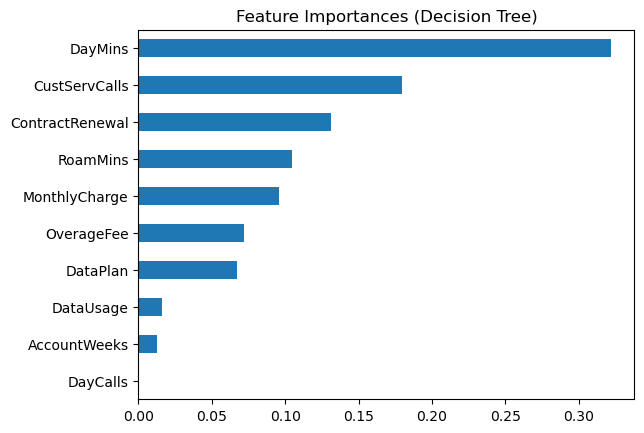

In [23]:
# Feature importances 
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances (Decision Tree)')

<Axes: title={'center': 'Feature Importances (Random Forest)'}>

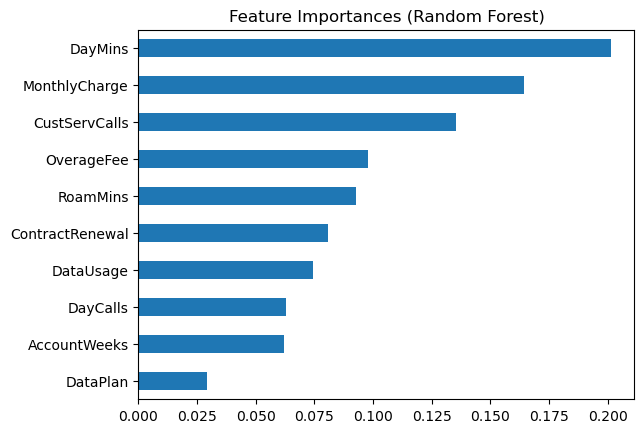

In [24]:
# Feature importances 
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances (Random Forest)')

<Axes: title={'center': 'Feature Importances (Gradient Boosting)'}>

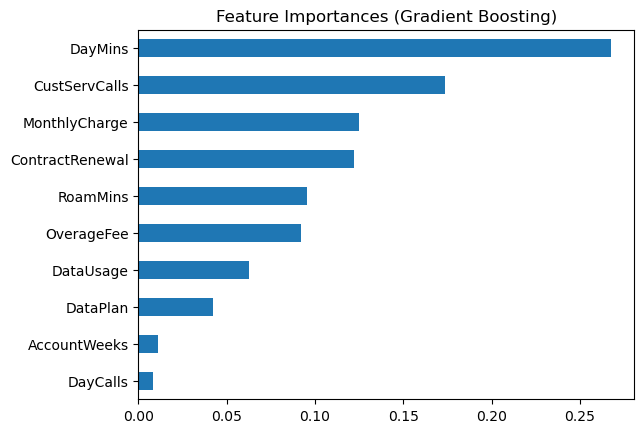

In [25]:
# Feature importances 
importances = pd.Series(gb_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances (Gradient Boosting)')

## Model Performance Observations and Best Performing Model
### Three models were evaluated for customer churn prediction: Gradient Boosting Classifier, Decision Tree Classifier, and Random Forest Classifier. The evaluation metrics used include accuracy, precision, recall, F1-score, and the confusion matrix.

🔹 Gradient Boosting Classifier
Accuracy: 94.3%

Recall for Class 1 (churned customers): 0.69

F1-score for Class 1: 0.77

This model achieved the highest accuracy and best balance between precision and recall, especially in identifying churned customers. It correctly predicted 98 out of 143 churned customers and had the lowest false negative count (45).

🔹 Decision Tree Classifier
Accuracy: 92.3%

Recall for Class 1: 0.57

F1-score for Class 1: 0.68

While simple and interpretable, the Decision Tree underperformed in identifying churned customers compared to the other models, misclassifying 61 churned customers.

🔹 Random Forest Classifier
Accuracy: 93.7%

Recall for Class 1: 0.62

F1-score for Class 1: 0.74

This model performed better than the Decision Tree, but slightly below Gradient Boosting in identifying churned customers. It misclassified 54 churned customers.

## Conclusion: Best Performing Model
The **Gradient Boosting Classifier** emerged as the **best performing model**. It not only achieved the **highest overall accuracy (94.3%)** but also provided the **most balanced and effective predictions** for both classes—especially the minority class (churned customers), which is critical in churn prediction tasks.

This makes Gradient Boosting the most reliable model for deployment in predicting customer churn in this project.

In [26]:
import joblib

In [27]:
joblib.dump(gb_model, 'gb_model.pkl')

['gb_model.pkl']